In [15]:
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import parselmouth
import scipy as sp

In [16]:
daps_path = "./daps"
environments = ["clean", "cleanraw", "ipad_balcony1", "ipad_bedroom1", "ipad_confroom1", 
                "ipad_confroom2", "ipad_livingroom1", "ipad_office1", "ipad_office2", 
                "ipadflat_confroom1", "ipadflat_office1", "iphone_balcony1", "iphone_bedroom1", 
                "iphone_livingroom1", "produced"]
scripts = [f"script{i}" for i in range(1, 6)]
speakers = [f"f{i}" for i in range(1, 11)] + [f"m{i}" for i in range(1, 11)]

In [17]:
def load_audio_data(path, speakers, environments, scripts):
    data = []

    for speaker in speakers:
        for script in scripts:
            for env in environments:
                wav_name = f"{speaker}_{script}_{env}.wav"
                wav_path = os.path.join(daps_path, env, wav_name)
                y, sr = librosa.load(wav_path, sr=16000)
                data.append((speaker, script, env, y, sr))
                print(f"Loaded {wav_name}")

    print("-------------------------------")
    print(f"Loaded {len(data)} .wav files")
    print("-------------------------------")
    return data

In [18]:
audio_data = load_audio_data(daps_path, speakers, environments, scripts)

Loaded f1_script1_clean.wav
Loaded f1_script1_cleanraw.wav
Loaded f1_script1_ipad_balcony1.wav
Loaded f1_script1_ipad_bedroom1.wav
Loaded f1_script1_ipad_confroom1.wav
Loaded f1_script1_ipad_confroom2.wav
Loaded f1_script1_ipad_livingroom1.wav
Loaded f1_script1_ipad_office1.wav
Loaded f1_script1_ipad_office2.wav
Loaded f1_script1_ipadflat_confroom1.wav
Loaded f1_script1_ipadflat_office1.wav
Loaded f1_script1_iphone_balcony1.wav
Loaded f1_script1_iphone_bedroom1.wav
Loaded f1_script1_iphone_livingroom1.wav
Loaded f1_script1_produced.wav
Loaded f1_script2_clean.wav
Loaded f1_script2_cleanraw.wav
Loaded f1_script2_ipad_balcony1.wav
Loaded f1_script2_ipad_bedroom1.wav
Loaded f1_script2_ipad_confroom1.wav
Loaded f1_script2_ipad_confroom2.wav
Loaded f1_script2_ipad_livingroom1.wav
Loaded f1_script2_ipad_office1.wav
Loaded f1_script2_ipad_office2.wav
Loaded f1_script2_ipadflat_confroom1.wav
Loaded f1_script2_ipadflat_office1.wav
Loaded f1_script2_iphone_balcony1.wav
Loaded f1_script2_iphone_b

KeyboardInterrupt: 

In [ ]:
def extract_features(y, speaker, script, env, sr = 16000, n_mfcc = 13):
    features = {}

    features["speaker"] = speaker
    features["script"] = script
    features["env"] = env

    ## Basic features
    features["y_mean"] = np.nanmean(y)
    features["y_std"] = np.nanstd(y)
    features["y_iqr"] = np.subtract(*np.percentile(y, [75, 25]))
    features["y_skew"] = sp.stats.skew(y)
    features["y_kurt"] = sp.stats.kurtosis(y)
    
    ## Temporal features
    
    # Root Mean Square energy
    features["rms"] = np.mean(librosa.feature.rms(y=y))
    
    # Zero Crossing Rate
    features["zcr"] = np.mean(librosa.feature.zero_crossing_rate(y))
    
    ## Spectral features
    
    # Mel-frequency cepstral coefficients
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    for i in range(n_mfcc):
        features[f"mfcc_{i+1}"] = np.mean(mfcc[i])

    # Specrtal centroid
    features["spectral_centroid"] = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    
    # Spectral bandwidth
    features["spectral_bandwidth"] = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    # Rolloff
    features["rolloff"] = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    
    # Spectral contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    for i in range(spectral_contrast.shape[0]):
        features[f"spectral_contrast_{i+1}"] = np.mean(spectral_contrast[i])
    
    ## Harmonic features
    
    # F0 / Pitch
    f0, _, _ = librosa.pyin(y, fmin=50, fmax=300)
    features["f0_mean"] = np.nanmean(f0)
    features["f0_std"] = np.nanstd(f0)
    
    # Harmonic-to-Noise-Ration (HNR)
    snd = parselmouth.Sound(y, sampling_frequency=sr)
    pitch = snd.to_pitch()
    harmonicity = snd.to_harmonicity()
    hnr = harmonicity.values
    features["hnr"] = np.nanmean(hnr) # average for signal
    
    return features


def process_audio(y, speaker, script, env, sr):
    #(y, speaker, script, env, sr) = args_
    print(f"Extracting features for: \"{speaker}_{script}_{env}\"")
    return extract_features(y=y, sr=sr, speaker=speaker, env=env, script=script)

In [ ]:
# this cell executes ~1h
features_list = []

#args_ = []
#for speaker, script, env, y, sr in audio_data:
#        args_.append((y, speaker, script, env, sr))

#with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
#        features_list = list(executor.map(defs.process_audio, args_))

for speaker, script, env, y, sr in audio_data:
    features_list.append(process_audio(y, speaker, script, env, sr))

print("--------------------------------")
print("Done!")
print("--------------------------------")

Extracting features for: "f1_script1_clean"
Extracting features for: "f1_script1_cleanraw"
Extracting features for: "f1_script1_ipad_balcony1"
Extracting features for: "f1_script1_ipad_bedroom1"
Extracting features for: "f1_script1_ipad_confroom1"
Extracting features for: "f1_script1_ipad_confroom2"
Extracting features for: "f1_script1_ipad_livingroom1"
Extracting features for: "f1_script1_ipad_office1"
Extracting features for: "f1_script1_ipad_office2"
Extracting features for: "f1_script1_ipadflat_confroom1"
Extracting features for: "f1_script1_ipadflat_office1"
Extracting features for: "f1_script1_iphone_balcony1"
Extracting features for: "f1_script1_iphone_bedroom1"
Extracting features for: "f1_script1_iphone_livingroom1"
Extracting features for: "f1_script1_produced"
Extracting features for: "f1_script2_clean"
Extracting features for: "f1_script2_cleanraw"
Extracting features for: "f1_script2_ipad_balcony1"
Extracting features for: "f1_script2_ipad_bedroom1"
Extracting features for

KeyboardInterrupt: 

In [20]:
features_df = pd.DataFrame(features_list)
features_df.shape

(168, 36)

In [21]:
#features_df["env"] = pd.DataFrame([env for speaker, script, env, y, sr in audio_data])
#features_df["speaker"] = pd.DataFrame([speaker for speaker, script, env, y, sr in audio_data])
#features_df["script"] = pd.DataFrame([script for speaker, script, env, y, sr in audio_data])
features_df = pd.read_csv("./features_df.DataFrame", sep="\t", encoding="utf-8", header=0)

In [22]:
features_df.columns

Index(['speaker', 'script', 'env', 'y_mean', 'y_std', 'y_iqr', 'y_skew',
       'y_kurt', 'rms', 'zcr', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4',
       'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11',
       'mfcc_12', 'mfcc_13', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'spectral_contrast_1', 'spectral_contrast_2',
       'spectral_contrast_3', 'spectral_contrast_4', 'spectral_contrast_5',
       'spectral_contrast_6', 'spectral_contrast_7', 'f0_mean', 'f0_std',
       'hnr', 'cluster'],
      dtype='object')

In [23]:
features_df.head()

speaker   script             env        y_mean     y_std     y_iqr  \
0      f1  script1           clean  3.531458e-06  0.070844  0.022116   
1      f1  script1        cleanraw  4.592445e-08  0.070932  0.022609   
2      f1  script1   ipad_balcony1 -9.077961e-06  0.086619  0.091953   
3      f1  script1   ipad_bedroom1 -5.233354e-05  0.065329  0.027849   
4      f1  script1  ipad_confroom1 -3.028109e-05  0.054603  0.025647   

     y_skew     y_kurt       rms       zcr  ...  spectral_contrast_2  \
0 -1.151486   9.506096  0.053747  0.084295  ...            17.804077   
1 -1.149401   9.481440  0.053990  0.090720  ...            17.764997   
2  0.032888   2.776377  0.080031  0.103107  ...            14.886252   
3  0.138063   7.692357  0.050360  0.102219  ...            18.415909   
4  0.501583  10.237486  0.042690  0.084364  ...            17.042696   

   spectral_contrast_3  spectral_contrast_4  spectral_contrast_5  \
0            20.131233            17.784262            19.084734   
1            20.789677            17.809113            18.871862   
2            15.564627            15.433223            17.191383   
3            20.072990            18.365466            17.967900   
4            18.356910            18.788473            18.019400   

   spectral_contrast_6  spectral_contrast_7     f0_mean     f0_std  \
0            19.864936            47.718805  191.169955  91.897175   
1            20.170392            48.568772  194.758755  90.621188   
2            18.031970            52.002780  247.418131  43.492550   
3            16.808875            51.484121  247.061023  44.865361   
4            17.518531            51.108207  243.903449  45.287998   

          hnr  cluster  
0 -106.161054        1  
1 -105.674148        1  
2  -81.807834        0  
3 -113.915640        1  
4 -122.711335        1  

[5 rows x 37 columns]

### Basic features

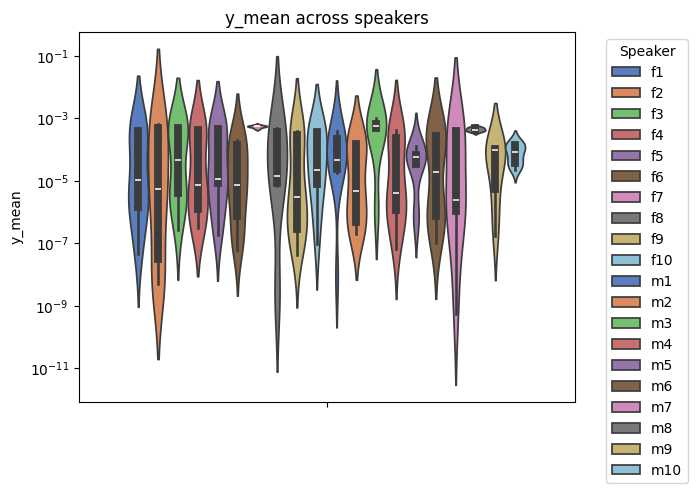

In [24]:
sns.violinplot(
    y="y_mean",
    data=features_df, 
    palette="muted",
    hue="speaker",
    legend=True,
    log_scale=True
)
plt.title("y_mean across speakers")
plt.legend(title="Speaker", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

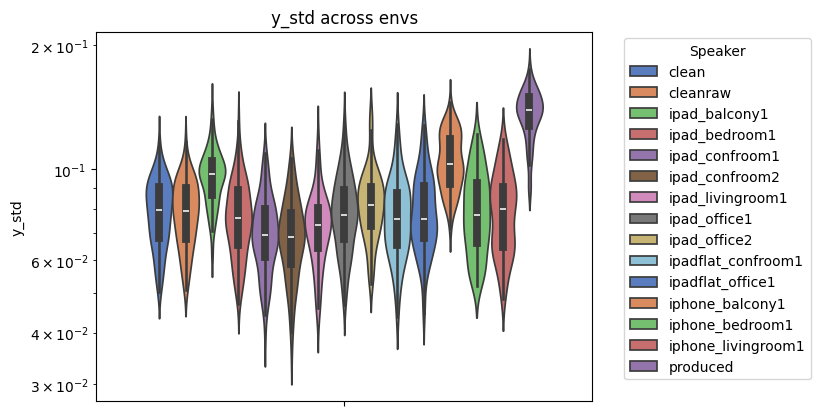

In [25]:
sns.violinplot(
    y="y_std",
    data=features_df, 
    palette="muted",
    hue="env",
    legend=True,
    log_scale=True
)
plt.title("y_std across envs")
plt.legend(title="Speaker", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

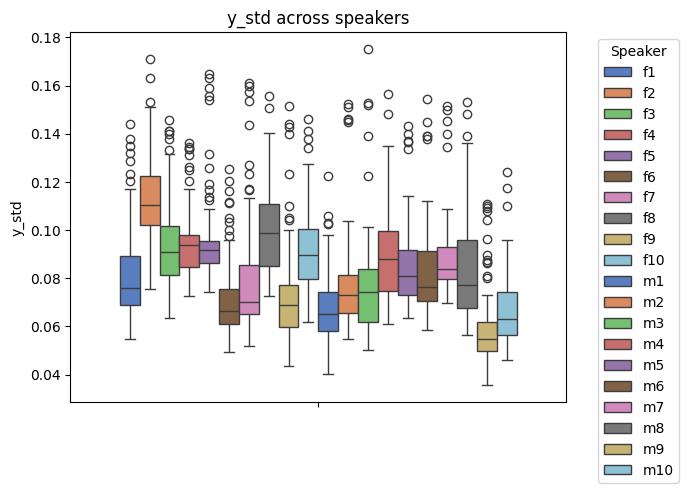

In [26]:
sns.boxplot(
    y="y_std", 
    data=features_df, 
    palette="muted",
    hue="speaker",
    legend=True
)
plt.title("y_std across speakers")
plt.legend(title="Speaker", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

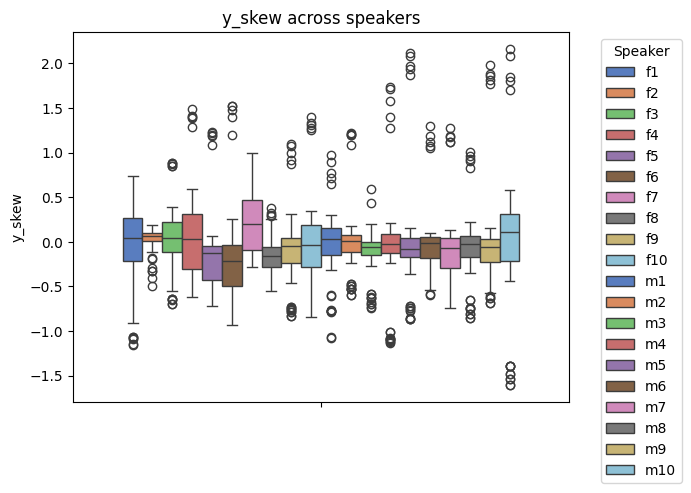

In [27]:
sns.boxplot(
    y="y_skew", 
    data=features_df, 
    palette="muted",
    hue="speaker",
    legend=True
)
plt.title("y_skew across speakers")
plt.legend(title="Speaker", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

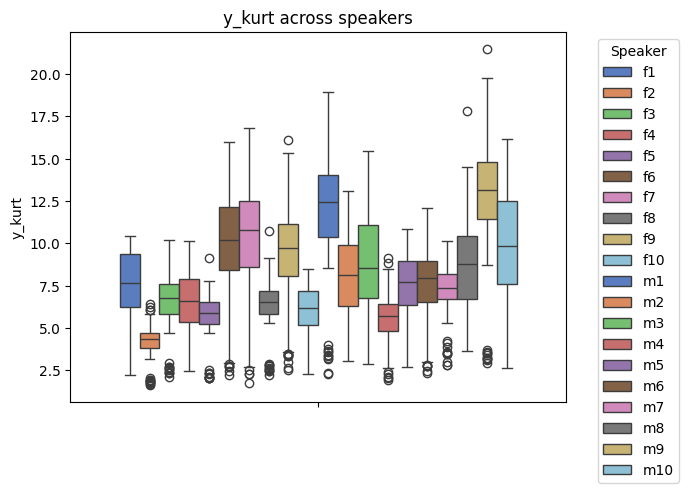

In [28]:
sns.boxplot(
    y="y_kurt", 
    data=features_df, 
    palette="muted",
    hue="speaker",
    legend=True
)
plt.title("y_kurt across speakers")
plt.legend(title="Speaker", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

### Speaker similarity

In [29]:
# Select MFCC features
n_mfcc = 13
mfcc_features = features_df[[f"mfcc_{i+1}" for i in range(n_mfcc)]]

# Standardize features
scaler = StandardScaler()
mfcc_scaled = scaler.fit_transform(mfcc_features)

# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=19)
features_df["cluster"] = kmeans.fit_predict(mfcc_scaled)

c:\Users\arsos\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\arsos\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


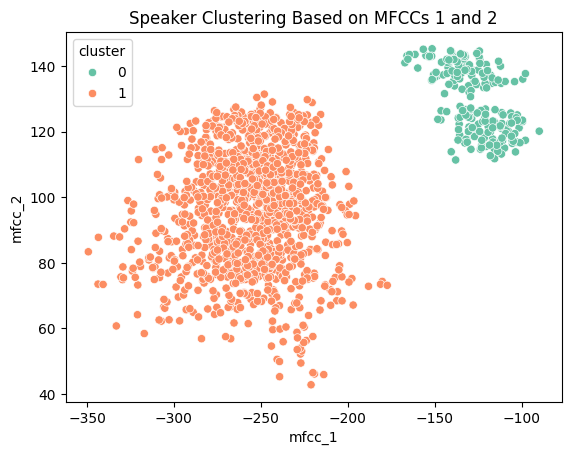

In [30]:
sns.scatterplot(
    x=features_df["mfcc_1"], 
    y=features_df["mfcc_2"], 
    hue=features_df["cluster"], 
    palette="Set2"
)
plt.title("Speaker Clustering Based on MFCCs 1 and 2")
plt.show()

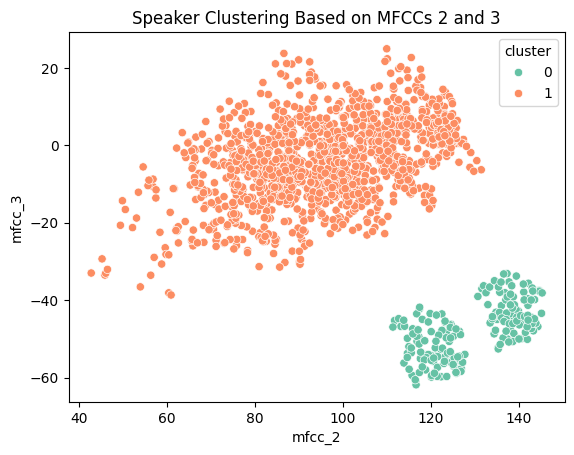

In [31]:
sns.scatterplot(
    x=features_df["mfcc_2"], 
    y=features_df["mfcc_3"], 
    hue=features_df["cluster"], 
    palette="Set2"
)
plt.title("Speaker Clustering Based on MFCCs 2 and 3")
plt.show()

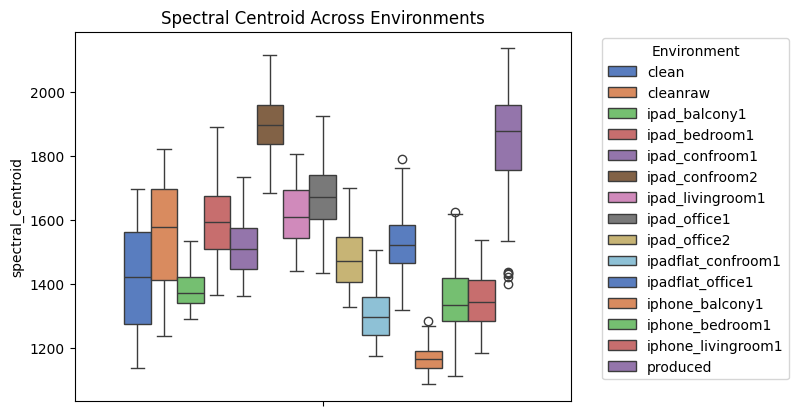

In [32]:
sns.boxplot(
    y="spectral_centroid", 
    data=features_df, 
    palette="muted",
    hue="env",
    legend=True
)
plt.title("Spectral Centroid Across Environments")
plt.legend(title="Environment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

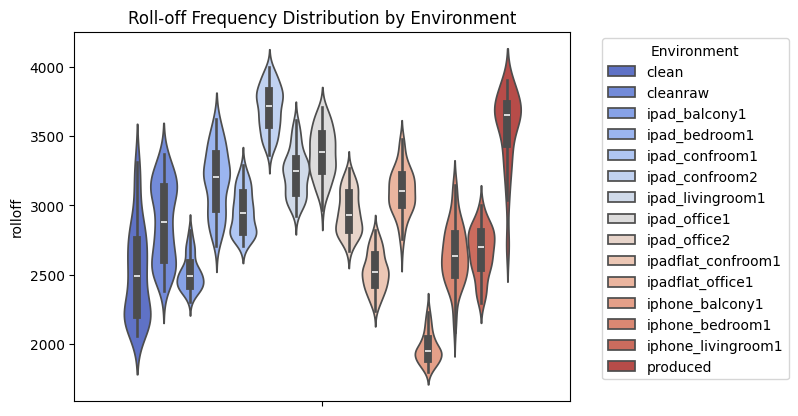

In [33]:
sns.violinplot(
    hue="env", 
    y="rolloff", 
    data=features_df, 
    palette="coolwarm",
    legend=True
)
plt.title("Roll-off Frequency Distribution by Environment")
plt.legend(title="Environment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

### Pitch (F0) Variability Analysis

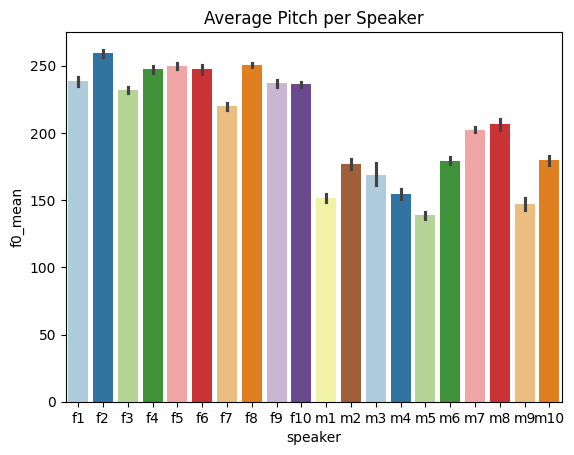

In [34]:
sns.barplot(
    hue="speaker", 
    x="speaker",
    y="f0_mean", 
    data=features_df, 
    palette="Paired",
    legend=False
)
plt.title("Average Pitch per Speaker")
plt.show()

['clean', 'cleanraw', 'ipad_balcony1', 'ipad_bedroom1', 'ipad_confroom1', 'ipad_confroom2', 'ipad_livingroom1', 'ipad_office1', 'ipad_office2', 'ipadflat_confroom1', 'ipadflat_office1', 'iphone_balcony1', 'iphone_bedroom1', 'iphone_livingroom1', 'produced']


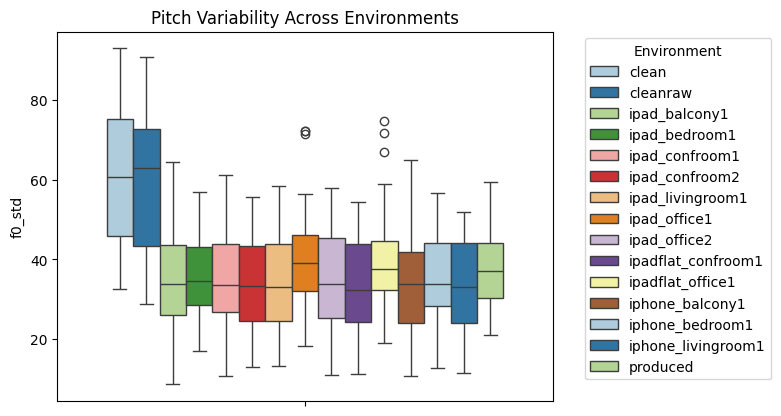

In [35]:
sns.boxplot(
    hue="env", 
    y="f0_std", 
    data=features_df, 
    palette="Paired",
    legend=True
)
plt.title("Pitch Variability Across Environments")
plt.legend(title="Environment", bbox_to_anchor=(1.05, 1), loc="upper left")
print([i for i in environments])
plt.show()

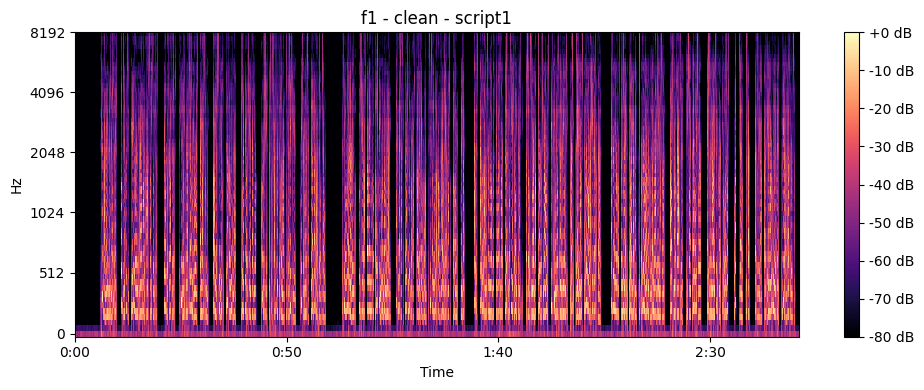

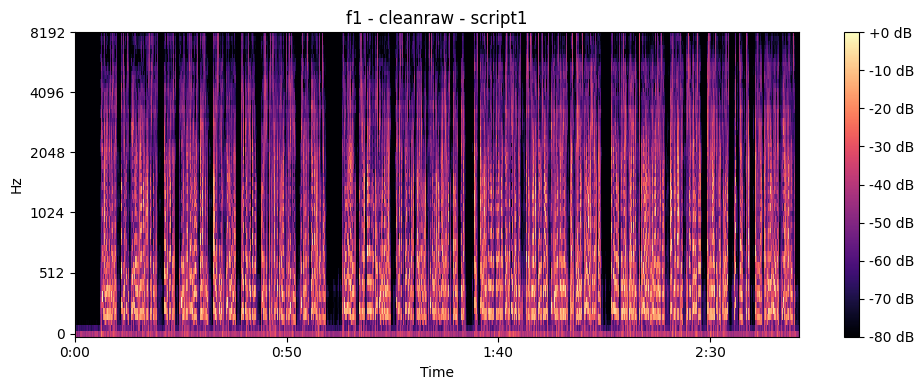

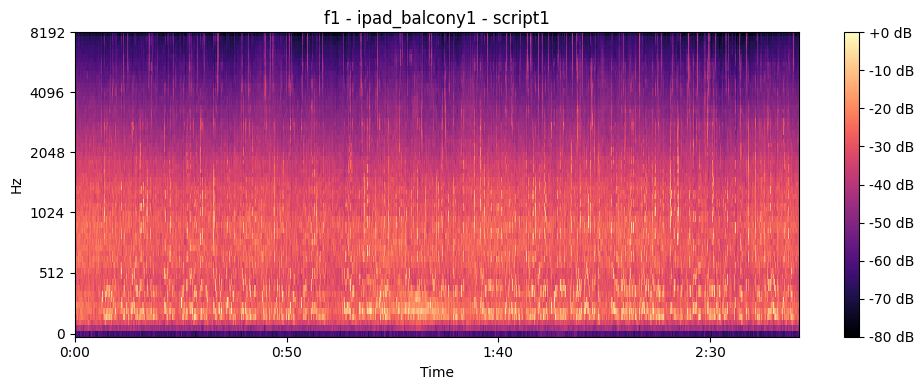

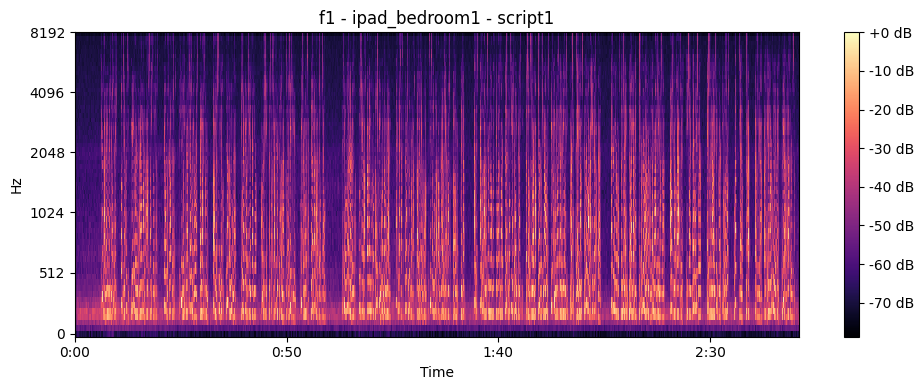

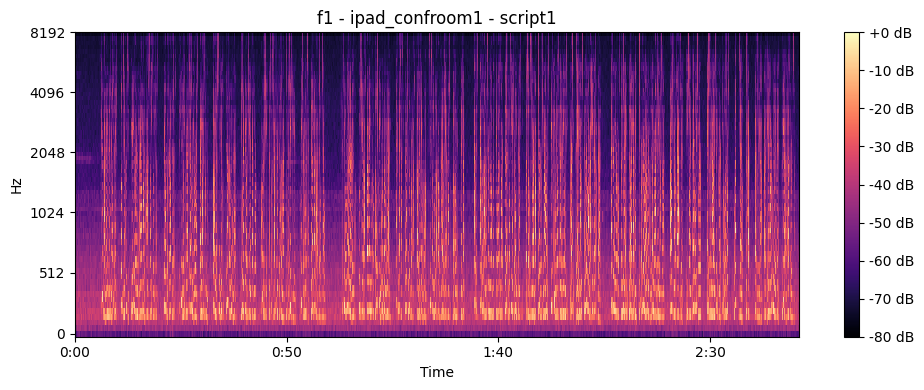

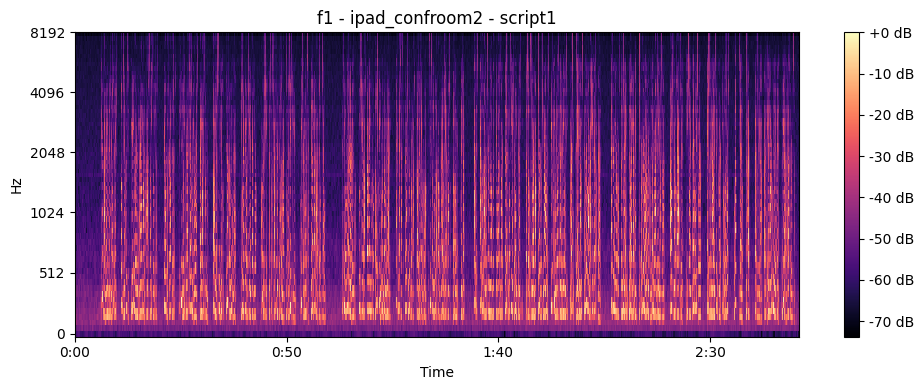

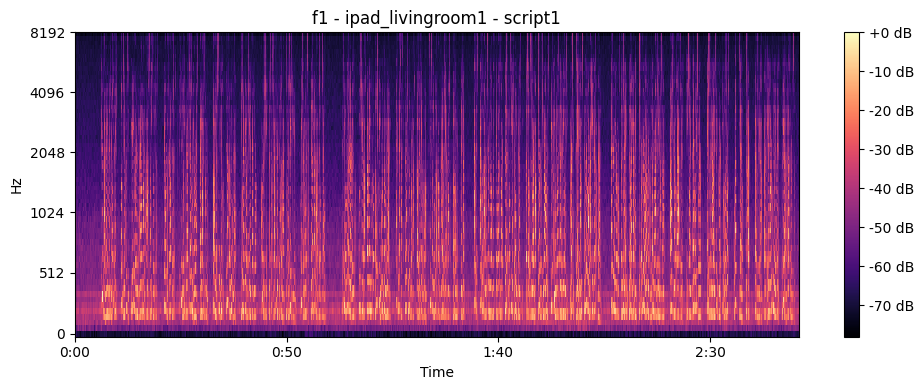

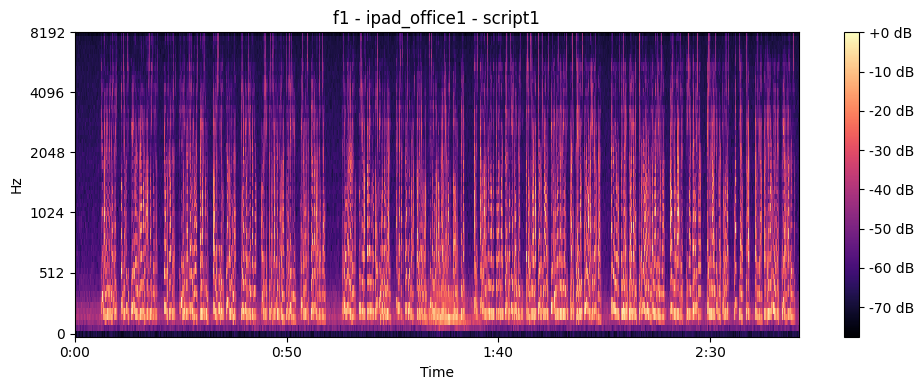

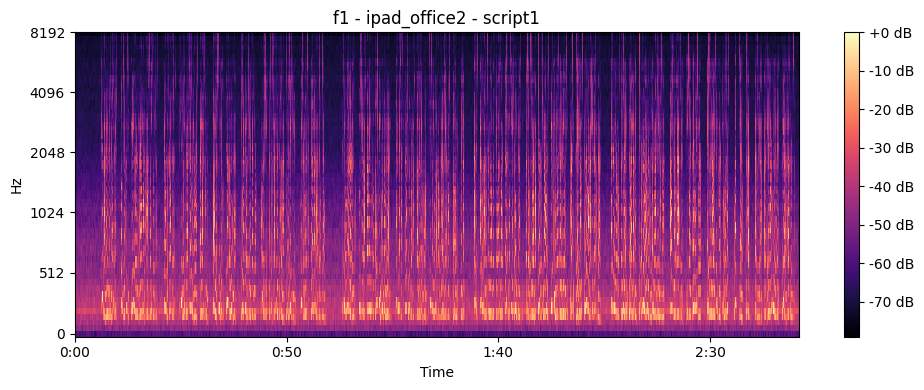

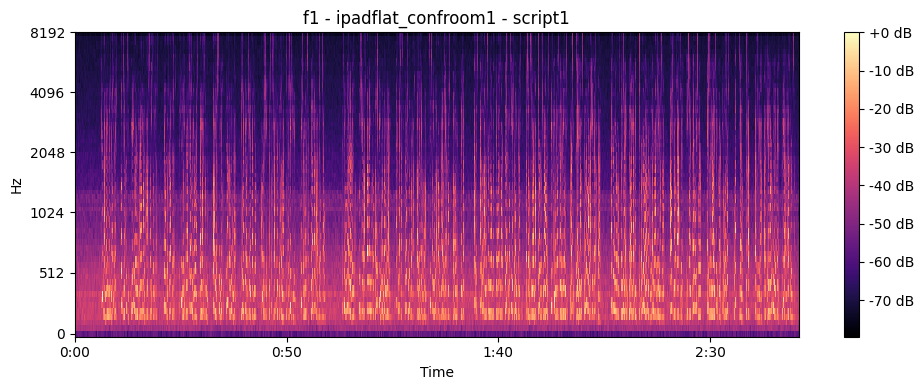

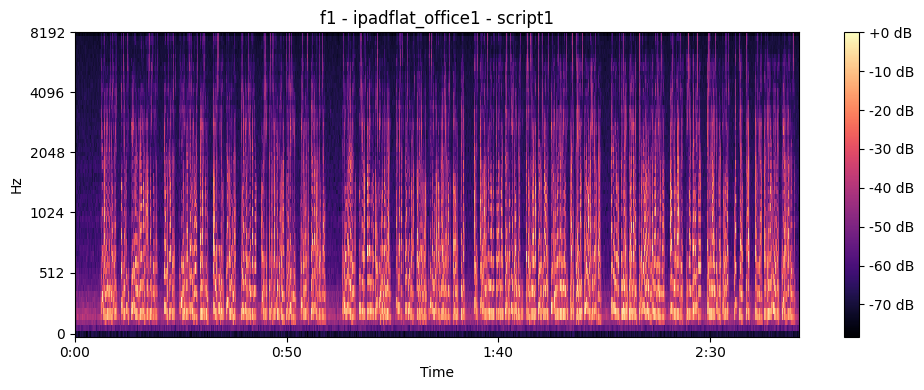

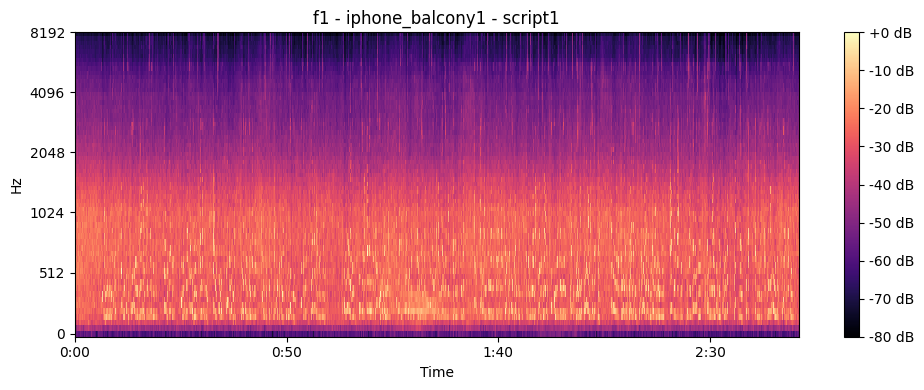

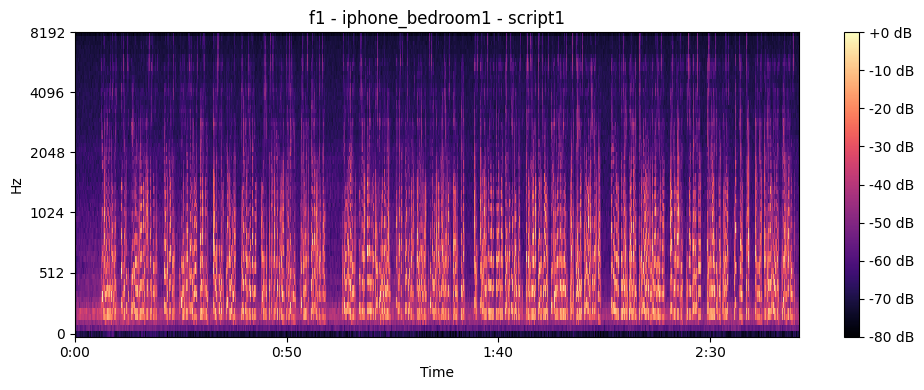

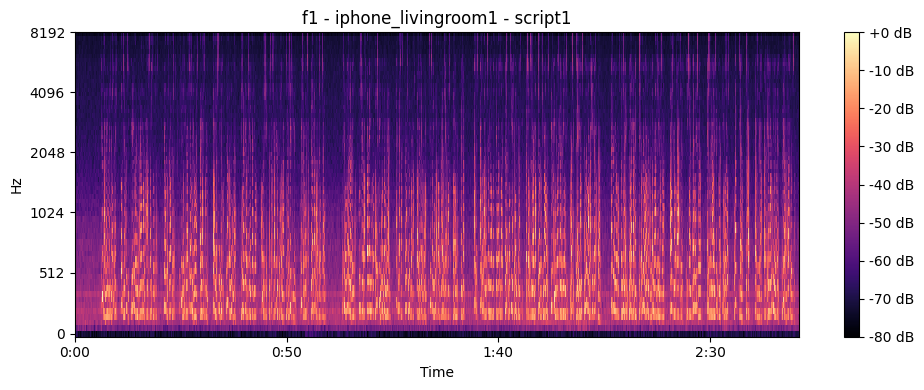

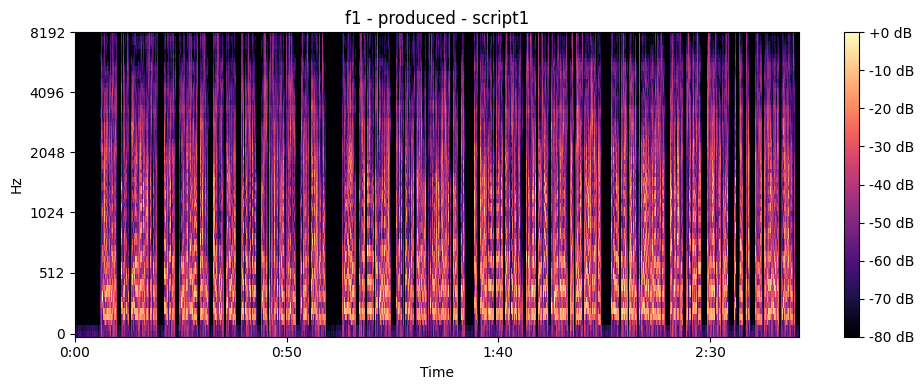

In [36]:
# Compare the spectrograms of the same phrase across different environments
def plot_spectrogram(y, sr, title):
    plt.figure(figsize=(10, 4))
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, sr=sr, x_axis="time", y_axis="mel", fmax=8000)
    plt.colorbar(format="%+2.0f dB")
    plt.title(title)
    plt.tight_layout()

# Example spectrograms
for speaker, script, env, y, sr in audio_data[:len(environments)]:
    plot_spectrogram(y, sr, f"{speaker} - {env} - {script}")


In [37]:
features_df.to_csv("./features_df.DataFrame", sep="\t", encoding="utf-8", index=False, header=True)

Duration Analysis

In [50]:
def analyze_audio_lengths(audio_data, sr=16000):
    """
    Analyze and visualize the duration of audio files in seconds.
    """
    lengths = [len(y) / sr for _, _, _, y, _ in audio_data]  # Convert length in samples to seconds
    plt.figure(figsize=(10, 6))
    plt.hist(lengths, bins=50, color='skyblue', edgecolor='black')
    plt.title("Distribution of Audio Durations")
    plt.xlabel("Duration (seconds)")
    plt.ylabel("Frequency")
    plt.show()

    print(f"Audio Durations:\n Min: {min(lengths):.2f} sec, Max: {max(lengths):.2f} sec, Mean: {np.mean(lengths):.2f} sec")
    return lengths

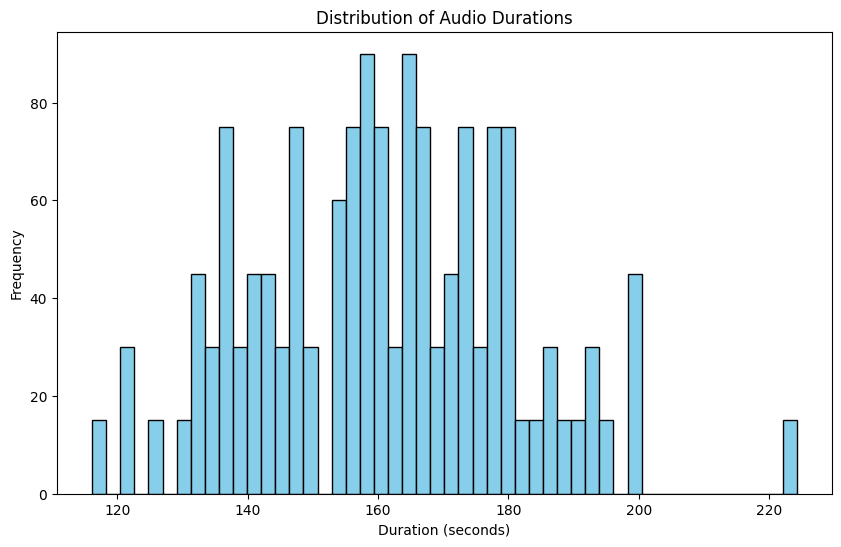

Audio Durations:
 Min: 116.16 sec, Max: 224.20 sec, Mean: 160.96 sec


In [51]:
audio_lengths = analyze_audio_lengths(audio_data)

Frequency Domain Analysis (Fourier Transform (Frequency Spectrum))

In [77]:
def plot_frequency_spectrum(y, sr, title):
    """
    Plot the frequency spectrum of an audio signal using Fourier Transform.
    """
    fft = np.fft.fft(y)
    magnitude = np.abs(fft)
    freq = np.fft.fftfreq(len(magnitude), 1 / sr)
    half_spectrum = freq[:len(freq) // 2], magnitude[:len(magnitude) // 2]
    
    plt.figure(figsize=(10, 6))
    plt.plot(half_spectrum[0], half_spectrum[1], color='purple')
    plt.title(f"Frequency Spectrum: {title}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.show()

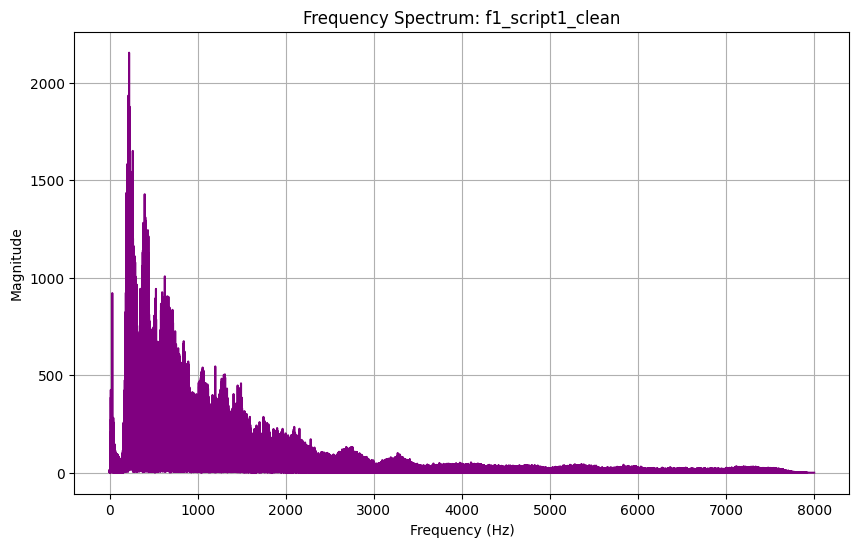

In [53]:
y, sr = audio_data[0][3], audio_data[0][4]
plot_frequency_spectrum(y, sr, title=f"{audio_data[0][0]}_{audio_data[0][1]}_{audio_data[0][2]}")

Silence Analysis

In [54]:
def analyze_silence(audio_data, sr=16000, top_db=20):
    """
    Analyze and visualize the silence ratio (percentage) for all audio files.
    """
    silence_ratios = []
    for speaker, script, env, y, _ in audio_data:
        # Split audio into non-silent intervals
        non_silent_intervals = librosa.effects.split(y, top_db=top_db)
        non_silent_duration = sum((end - start) for start, end in non_silent_intervals)
        total_duration = len(y)
        silence_ratio = 1 - (non_silent_duration / total_duration)
        silence_ratios.append((speaker, script, env, silence_ratio * 100))

    # Convert to DataFrame for better handling
    silence_df = pd.DataFrame(silence_ratios, columns=["Speaker", "Script", "Environment", "Silence Ratio (%)"])

    # Plot the silence ratio distribution
    plt.figure(figsize=(10, 6))
    plt.hist(silence_df["Silence Ratio (%)"], bins=50, color='orange', edgecolor='black')
    plt.title("Distribution of Silence Ratios")
    plt.xlabel("Silence Percentage (%)")
    plt.ylabel("Frequency")
    plt.show()

    print(f"Silence Ratios (Min, Max, Mean): {silence_df['Silence Ratio (%)'].min():.2f}%, {silence_df['Silence Ratio (%)'].max():.2f}%, {silence_df['Silence Ratio (%)'].mean():.2f}%")
    return silence_df


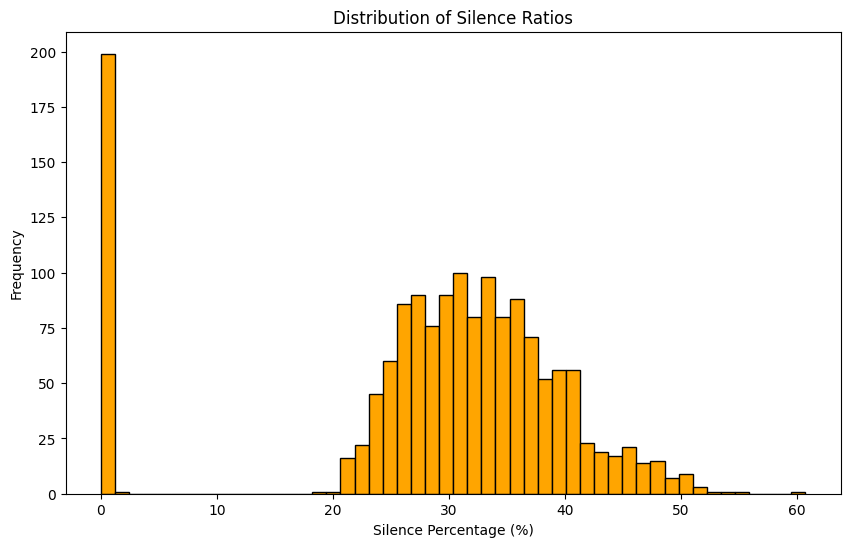

Silence Ratios (Min, Max, Mean): 0.00%, 60.76%, 28.69%


In [55]:
silence_df = analyze_silence(audio_data)

Spectral Distribution Analysis

In [59]:
def analyze_spectral_distribution(features_df):
    """
    Visualize spectral feature distributions across speakers and environments.
    """
    # Ensure correct column names based on your DataFrame structure
    env_col = "env"  # Update this if necessary
    centroid_col = "spectral_centroid"  # Update this if necessary
    bandwidth_col = "spectral_bandwidth"  # Update this if necessary
    rolloff_col = "rolloff"  # Update this if necessary

    # Spectral Centroid
    sns.boxplot(x=env_col, y=centroid_col, data=features_df, palette="coolwarm")
    plt.title("Spectral Centroid Across Environments")
    plt.xticks(rotation=45)
    plt.show()

    # Spectral Bandwidth
    sns.boxplot(x="speaker", y=bandwidth_col, data=features_df, palette="coolwarm")
    plt.title("Spectral Bandwidth Across Speakers")
    plt.xticks(rotation=45)
    plt.show()

    # Spectral Rolloff
    sns.violinplot(x=env_col, y=rolloff_col, data=features_df, palette="viridis")
    plt.title("Rolloff Frequency Distribution by Environment")
    plt.xticks(rotation=45)
    plt.show()


C:\Users\arsos\AppData\Local\Temp\ipykernel_2616\2823542912.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=env_col, y=centroid_col, data=features_df, palette="coolwarm")


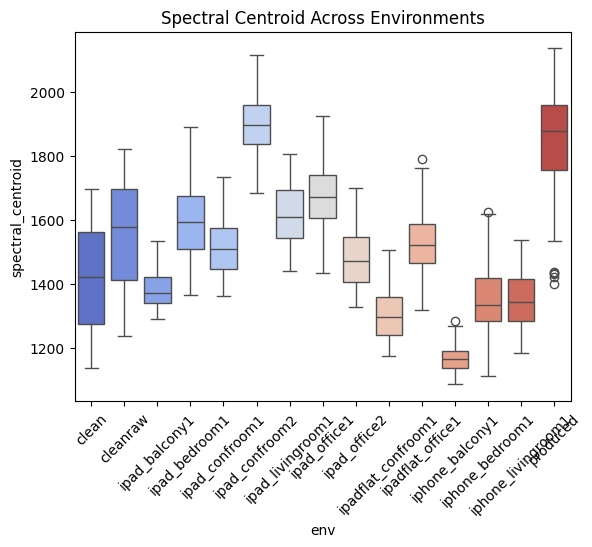

C:\Users\arsos\AppData\Local\Temp\ipykernel_2616\2823542912.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="speaker", y=bandwidth_col, data=features_df, palette="coolwarm")


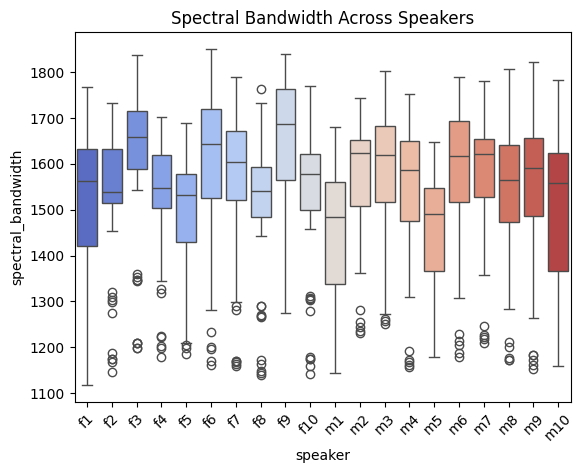

C:\Users\arsos\AppData\Local\Temp\ipykernel_2616\2823542912.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=env_col, y=rolloff_col, data=features_df, palette="viridis")


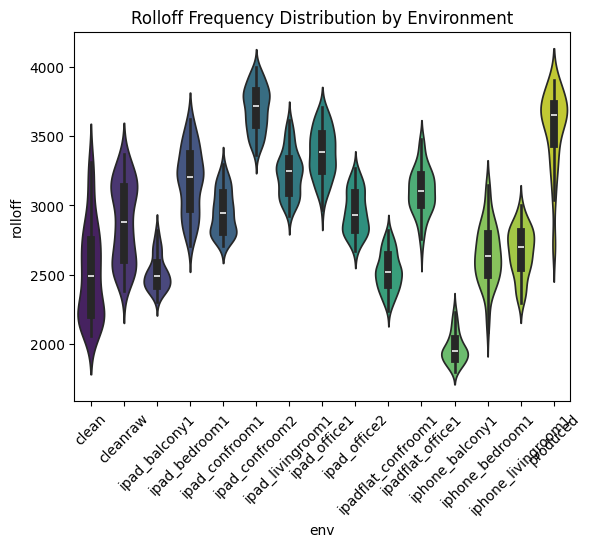

In [60]:
analyze_spectral_distribution(features_df)

In [71]:
def frequency_distribution_by_gender(features_df):
    """
    Plot male and female distributions based on fundamental frequency (f0_mean).
    """
    # Add gender column
    features_df['gender'] = features_df['speaker'].str[0].map({'f': 'Female', 'm': 'Male'})

    # Remove NaN or invalid values from f0_mean
    valid_features_df = features_df[~features_df['f0_mean'].isna()]

    # Plot the distributions
    plt.figure(figsize=(12, 6))
    sns.histplot(data=valid_features_df, x='f0_mean', hue='gender', kde=True, palette='Set2', bins=30)
    plt.title("Frequency Distribution by Gender (f0_mean)")
    plt.xlabel("Average Fundamental Frequency (Hz)")
    plt.ylabel("Count")
    plt.show()

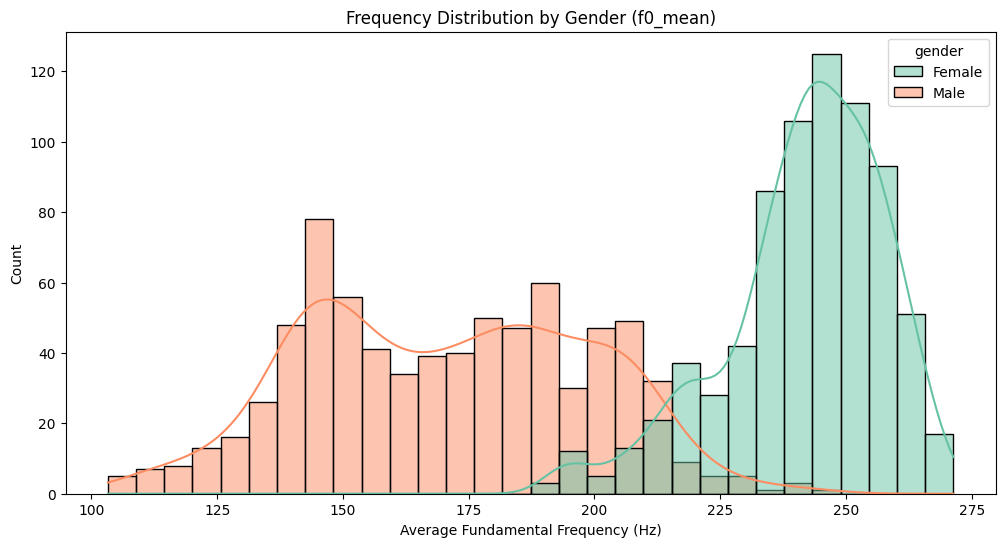

In [72]:
frequency_distribution_by_gender(features_df)

In [74]:
def plot_waveforms(audio_data, num_samples=5):
    """
    Plot waveforms of selected audio samples.
    """
    plt.figure(figsize=(15, num_samples * 3))
    for i, (_, script, env, y, sr) in enumerate(audio_data[:num_samples]):
        plt.subplot(num_samples, 1, i + 1)
        plt.plot(np.arange(len(y)) / sr, y, color='blue')
        plt.title(f"Waveform: {script} - {env}")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

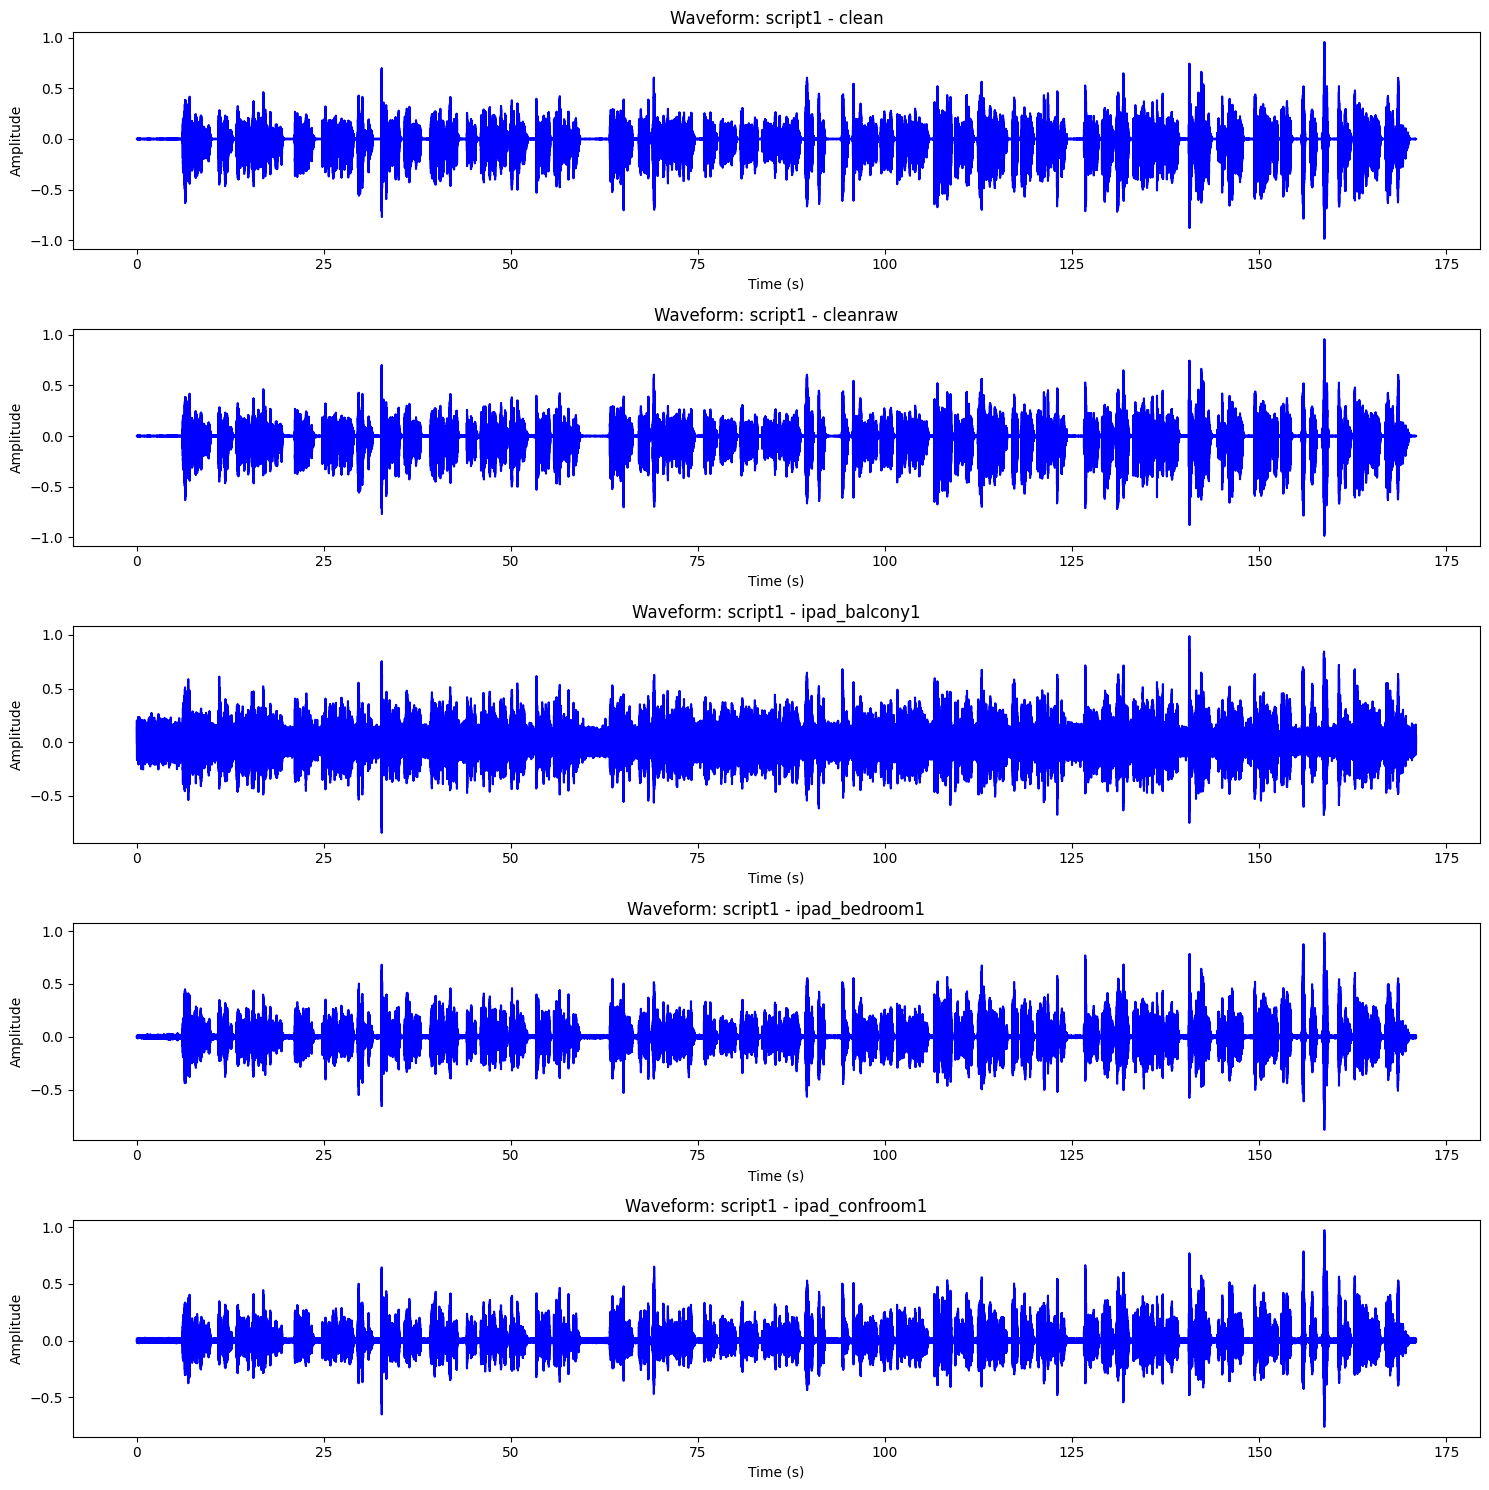

In [75]:
plot_waveforms(audio_data)